### **Converting .json files to tf.constant**

In [1]:
import os
import tensorflow as tf
import json
import numpy as np

dataset_json_path = "C:\\Users\\DELL\\Desktop\\Pulchowk\\Major_Project\\ChordClassification\\ChordDatasets\\dataset_json"
c = 1
a=0

# List all files in the folder
for file_name in os.listdir(dataset_json_path):
    file_path = os.path.join(dataset_json_path, file_name)  # Full file path
    
    if file_name.endswith(".json"):  # Process only .json files
        with open(file_path, "r") as json_file:  # Open the file
            json_data = json.load(json_file)  # Load JSON content
            # print(json_data)  # Debugging: print JSON content

    
            # Convert JSON data to TF-compatible format
            if isinstance(json_data, dict):
                # Assuming a dictionary with scalar values
                tf_data = {k: tf.constant(v) for k, v in json_data.items()}
            elif isinstance(json_data, list):
                # Assuming a list of scalars or arrays
                tf_data = [tf.constant(x) for x in json_data]
            elif isinstance(json_data, np.ndarray):
                # Assuming a JSON-encoded NumPy array
                tf_data = tf.constant(json_data)
            else:
                raise ValueError("Unsupported JSON data structure")
            # print(tf_data)

            a=a+1
            print(a,file_path)

            if c == 1:
                tf_data_X = tf.constant(tf_data['pitch'])
                tf_data_Y = tf.constant(tf_data['labels'])
                c = 0
            else:
                tf_data_X = tf.concat([tf_data_X, tf.constant(tf_data['pitch'])], axis=0)
                tf_data_Y = tf.concat([tf_data_Y, tf.constant(tf_data['labels'])], axis=0)


# print(tf_data_X.shape)
# print(tf_data_Y.shape)
# print(tf_data_X)
# print(tf_data_Y)

1 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part1.json
2 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part10.json
3 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part11.json
4 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part12.json
5 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part13.json
6 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part14.json
7 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part15.json
8 C:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordDatasets\dataset_json\A#m_accordian1_20_part16.json
9 C:\User

In [2]:
# Cast tf_data_Y to float32 to match tf_data_X
tf_data_Y = tf.cast(tf_data_Y, tf.float32)

In [3]:
import numpy as np

# Check if there are any NaN values
print("NaN in tf_data_X:", np.isnan(tf_data_X).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(tf_data_X))  

# Print the locations (row, column) of NaNs
print("NaN locations in tf_data_X:", nan_indices)


NaN in tf_data_X: False
NaN locations in tf_data_X: []


In [4]:
tf_dataset = tf.concat([tf_data_X, tf_data_Y], axis=-1)
print(tf_dataset.shape)
print(tf_dataset)

(5840, 36)
tf.Tensor(
[[0.06438943 0.14778799 0.06286415 ... 0.         0.         0.        ]
 [0.05730631 0.21261251 0.05818551 ... 0.         0.         0.        ]
 [0.067454   0.13290407 0.0649313  ... 0.         0.         0.        ]
 ...
 [0.00851205 0.00818775 0.4770042  ... 0.         0.         0.        ]
 [0.01338249 0.01540688 0.42645866 ... 0.         0.         0.        ]
 [0.0080606  0.00664939 0.5191406  ... 0.         0.         0.        ]], shape=(5840, 36), dtype=float32)


In [5]:
tf_dataset = tf.random.shuffle(tf_dataset)
print(tf_dataset[:5])

tf.Tensor(
[[3.95455118e-03 1.44379935e-03 2.93094367e-01 1.82540342e-03
  6.14471792e-04 1.91972762e-01 3.07012326e-03 7.23678793e-04
  1.76472182e-03 6.50990382e-03 4.90913928e-01 4.11229441e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.82418900e-03 1.53807865e-03 6.70509832e-03 1.33535778e-02
  4.18786436e-01 1.11528635e-02 2.86720563e-02 1.80143695e-02
  1.79326355e-01 4.73084906e-03 3.66965937e-03 3.09226453e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [6]:
X = tf_dataset[:,:-24]
print(X[:5])

tf.Tensor(
[[0.00395455 0.0014438  0.29309437 0.0018254  0.00061447 0.19197276
  0.00307012 0.00072368 0.00176472 0.0065099  0.49091393 0.00411229]
 [0.00482419 0.00153808 0.0067051  0.01335358 0.41878644 0.01115286
  0.02867206 0.01801437 0.17932636 0.00473085 0.00366966 0.30922645]
 [0.0013306  0.00191851 0.00265556 0.14672558 0.00080794 0.00135077
  0.13233936 0.00302443 0.00156987 0.00429833 0.5673493  0.13662975]
 [0.00547366 0.04372396 0.09349489 0.13396524 0.00922502 0.00505847
  0.09414209 0.05010702 0.03459746 0.05544441 0.25000566 0.22476211]
 [0.0081686  0.41649145 0.00670139 0.00151378 0.00236998 0.00802269
  0.21142502 0.00609525 0.03435689 0.06525536 0.23526847 0.00433112]], shape=(5, 12), dtype=float32)


In [7]:
y = tf_dataset[:,-24:]
print(y[:5].shape)
print(y[:5])
# y = tf.expand_dims(y, axis = -1)
# print(y[:5])

(5, 24)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(5, 24), dtype=float32)


In [8]:
print(X.shape)

(5840, 12)


In [9]:
import numpy as np

# Check if there are any NaN values
print("NaN in X:", np.isnan(X).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(X))  

# Print the locations (row, column) of NaNs
print("NaN locations in X:", nan_indices)


NaN in X: False
NaN locations in X: []


In [10]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)

5840


In [11]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(X_train)
print(y_train.shape)

(4672, 12)
tf.Tensor(
[[0.00395455 0.0014438  0.29309437 ... 0.0065099  0.49091393 0.00411229]
 [0.00482419 0.00153808 0.0067051  ... 0.00473085 0.00366966 0.30922645]
 [0.0013306  0.00191851 0.00265556 ... 0.00429833 0.5673493  0.13662975]
 ...
 [0.00923968 0.40252715 0.00836688 ... 0.07389995 0.24688339 0.00486791]
 [0.0074448  0.00913449 0.07286594 ... 0.00944144 0.31385124 0.0327291 ]
 [0.01763466 0.02707665 0.46514902 ... 0.32461816 0.00348361 0.01844643]], shape=(4672, 12), dtype=float32)
(4672, 24)


In [12]:
import numpy as np

# Check if there are any NaN values
print("NaN in X_train:", np.isnan(X_train).any())  

# Get indices of NaN values
nan_indices = np.argwhere(np.isnan(X_train))  

# Print the locations (row, column) of NaNs
print("NaN locations in X_train:", nan_indices)


NaN in X_train: False
NaN locations in X_train: []


In [13]:
# Function to add noise
def add_noise(X, noise_level=0.02):
    noise = tf.random.normal(shape=tf.shape(X), mean=0.0, stddev=noise_level, dtype=tf.float32)
    return X + noise

# Function to shift pitch
def shift_pitch(X, shift_steps):
    return tf.roll(X, shift=shift_steps, axis=1)  # Rolls along pitch axis

# Function to scale pitch energy
def scale_pitch(X, scale_factor=0.1):
    return X * (1 + scale_factor * tf.random.normal(shape=tf.shape(X), mean=0.0, stddev=1.0))

# Function to create augmented versions
def augment_data(X, y, num_augmentations=3):
    augmented_X = []
    augmented_y = []
    
    for _ in range(num_augmentations):
        X_aug = add_noise(X)
        X_aug = shift_pitch(X_aug, shift_steps=np.random.randint(-2, 3))  # Shift -2 to +2
        X_aug = scale_pitch(X_aug)
        
        augmented_X.append(X_aug)
        augmented_y.append(y)  # Labels stay the same
    
    return tf.concat([X] + augmented_X, axis=0), tf.concat([y] + augmented_y, axis=0)

# Apply augmentation
num_augmentations = 1  # Creates 3 additional versions, so dataset size increases 4x
X_augmented, y_augmented = augment_data(X_train, y_train, num_augmentations=num_augmentations)

# Shuffle dataset
tf_dataset = tf.concat([X_augmented, y_augmented], axis=-1)
tf_dataset = tf.random.shuffle(tf_dataset)

# Split dataset back
X_train_aug = tf_dataset[:, :-24]
y_train_aug = tf_dataset[:, -24:]

print(f"Original dataset size: {X_train_aug.shape[0] // (num_augmentations + 1)}")
print(f"Augmented dataset size: {X_train_aug.shape[0]}")


Original dataset size: 4672
Augmented dataset size: 9344


In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#aug train_dataset = tf.data.Dataset.from_tensor_slices((X_train_aug, y_train_aug))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [15]:
for x,_y in train_dataset:
  print(x,_y)
  break

tf.Tensor(
[[4.85517876e-03 1.38186561e-02 2.56727785e-01 7.46710738e-03
  3.51747759e-02 5.70896128e-03 1.62082873e-02 4.03333455e-03
  3.06432811e-03 6.43800378e-01 6.69813529e-03 2.44306866e-03]
 [5.47365658e-03 4.37239632e-02 9.34948921e-02 1.33965239e-01
  9.22502484e-03 5.05847065e-03 9.41420868e-02 5.01070172e-02
  3.45974639e-02 5.54444082e-02 2.50005662e-01 2.24762112e-01]
 [3.95455118e-03 1.44379935e-03 2.93094367e-01 1.82540342e-03
  6.14471792e-04 1.91972762e-01 3.07012326e-03 7.23678793e-04
  1.76472182e-03 6.50990382e-03 4.90913928e-01 4.11229441e-03]
 [2.22876474e-01 6.58757938e-03 9.12953913e-03 2.27303982e-01
  3.79074179e-02 6.23476692e-03 5.73725393e-03 1.06548727e-01
  2.98985869e-01 7.21369032e-03 6.60724640e-02 5.40222973e-03]
 [5.97922923e-03 4.89187147e-03 2.93745309e-01 6.78581838e-03
  3.64777213e-03 3.43443709e-03 5.32311993e-03 3.19220215e-01
  1.18059274e-02 2.29736883e-02 3.14763069e-01 7.42955552e-03]
 [2.67648473e-02 3.70529443e-01 2.07259730e-02 2.29438

In [16]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(584, 12)
(584, 24)


In [17]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [18]:
for x,__y in val_dataset:
  print(x,__y)
  break

tf.Tensor(
[[1.31999457e-03 1.79329305e-03 1.87064260e-02 5.54620087e-01
  4.87217307e-03 2.40297732e-03 4.03238647e-03 2.55847692e-01
  1.27014064e-03 1.06516900e-03 1.52214572e-01 1.85509049e-03]
 [1.69171055e-03 1.62967260e-03 1.36567364e-02 1.14260931e-02
  3.91902477e-01 2.73001734e-02 9.17632207e-02 2.78139830e-01
  6.87408820e-03 5.91032067e-03 3.22725880e-03 1.66478425e-01]
 [1.08035006e-01 2.10933998e-01 7.65382592e-03 8.44103396e-02
  8.92862398e-03 2.05783308e-01 1.74633190e-02 1.74065493e-02
  2.70723909e-01 4.73028161e-02 1.11225070e-02 1.02357920e-02]
 [2.96116527e-03 3.39228541e-01 3.47025832e-03 3.43461335e-03
  2.63653815e-01 2.30285968e-03 7.42199190e-04 6.89279870e-04
  3.77783805e-01 1.20345305e-03 4.37516050e-04 4.09247587e-03]
 [2.07361188e-02 5.44806570e-02 2.67112106e-01 3.97251314e-03
  1.04865201e-01 4.62848833e-03 1.45851538e-01 4.63927910e-02
  2.92513613e-02 3.02954942e-01 1.57260448e-02 4.02824068e-03]
 [4.06891666e-03 3.76690738e-02 4.90366779e-02 8.29864

In [19]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(584, 12)
(584, 24)


In [20]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(16).prefetch(tf.data.AUTOTUNE)

In [21]:
import numpy as np

# Check if there are NaN or Inf values in training data
print("NaN in X_train:", np.isnan(X_train).any())
print("Inf in X_train:", np.isinf(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())


NaN in X_train: False
Inf in X_train: False
NaN in y_train: False
Inf in y_train: False


### **Model Creation**

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout, BatchNormalization, LSTM, GRU
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

In [23]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(12,)),
    Dense(256),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.2),
    
    Dense(256),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.2),
    
    Dense(128),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.2),
    
    Dense(24, activation="softmax")
])


model.summary()

c:\Users\DELL\Desktop\Pulchowk\Major_Project\ChordClassification\ChordClassification\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,672 (420.59 KB)

 Trainable params: 106,392 (415.59 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [24]:
import numpy as np

# Check if there are NaN or Inf values in training data
print("NaN in X_train:", np.isnan(X_train).any())
print("Inf in X_train:", np.isinf(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())


NaN in X_train: False
Inf in X_train: False
NaN in y_train: False
Inf in y_train: False


In [25]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [26]:
# Adjust your schedule or try ReduceLROnPlateau
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.98,
    staircase=True
)


# optimizer = Adam(learning_rate=lr_schedule)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)  # Slight smoothing

In [27]:
model.compile(optimizer = optimizer, 
              loss=CategoricalCrossentropy(),
              metrics=[TopKCategoricalAccuracy(k=8)]) # For example, top-5 accuracy

In [28]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [29]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,  # possibly train longer
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3482 - top_k_categorical_accuracy: 0.9078 - val_loss: 1.5356 - val_top_k_categorical_accuracy: 0.9897 - learning_rate: 0.0010
Epoch 2/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3724 - top_k_categorical_accuracy: 0.9970 - val_loss: 0.1981 - val_top_k_categorical_accuracy: 0.9983 - learning_rate: 0.0010
Epoch 3/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2682 - top_k_categorical_accuracy: 0.9989 - val_loss: 0.1357 - val_top_k_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 4/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2497 - top_k_categorical_accuracy: 0.9986 - val_loss: 0.1042 - val_top_k_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 5/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2067 - top_k_categorical_accuracy: 0.9985 - val_loss: 0.1028 - val_top_k_categorical_accuracy: 1.0000 - learning_rate: 0.0010
Epoch 6/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

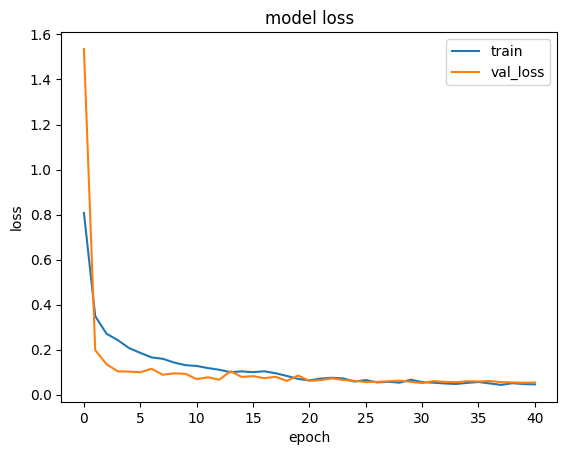

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

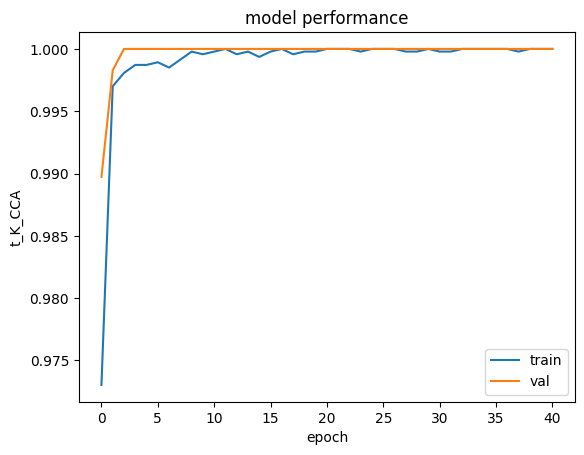

In [31]:
plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('t_K_CCA')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [32]:
# %pip install seaborn

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


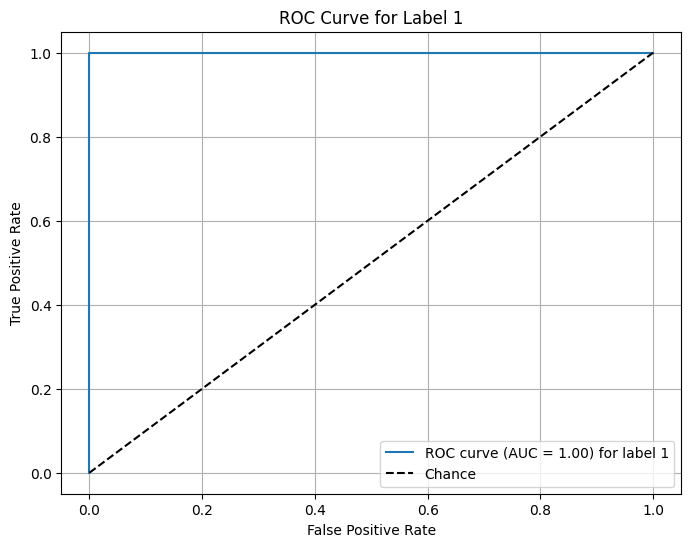

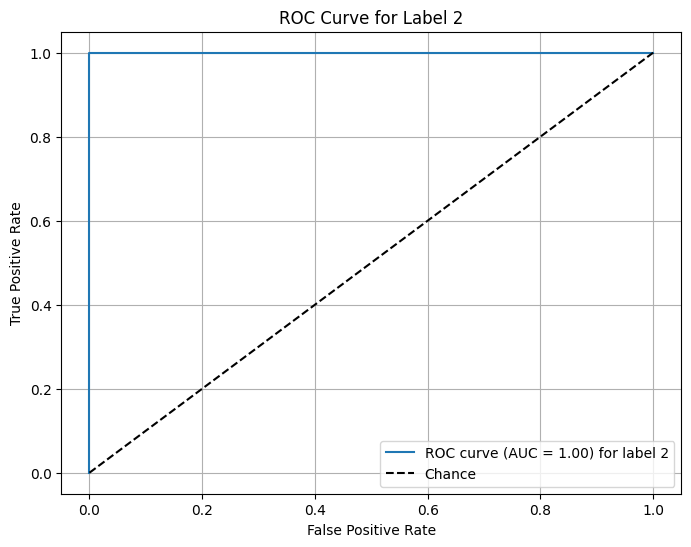

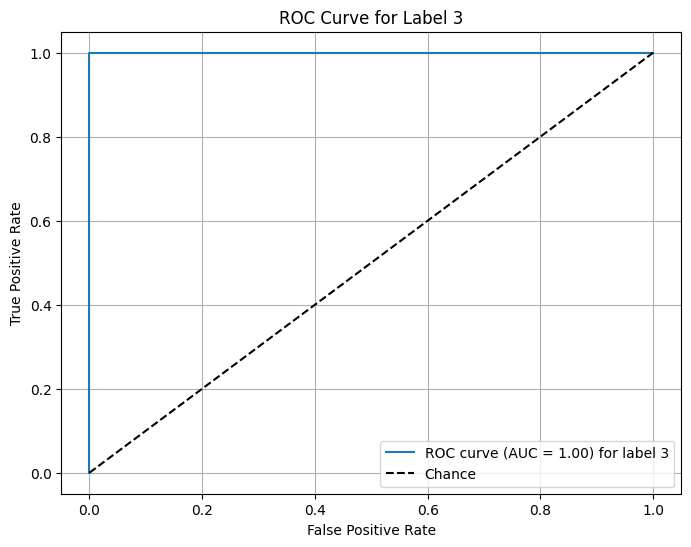

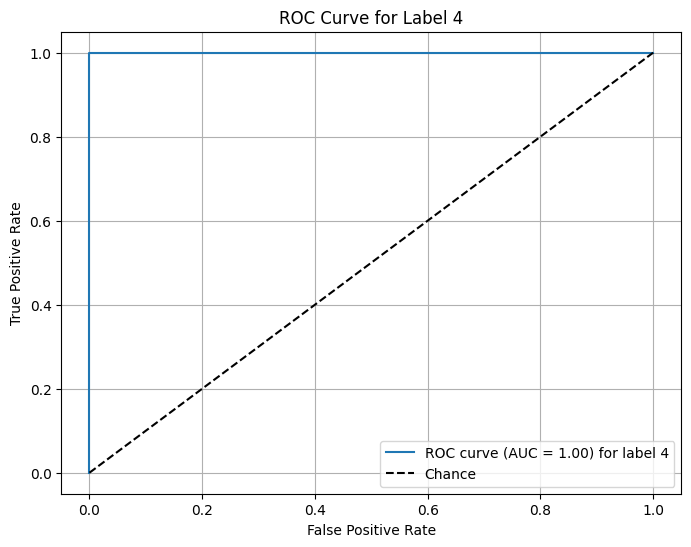

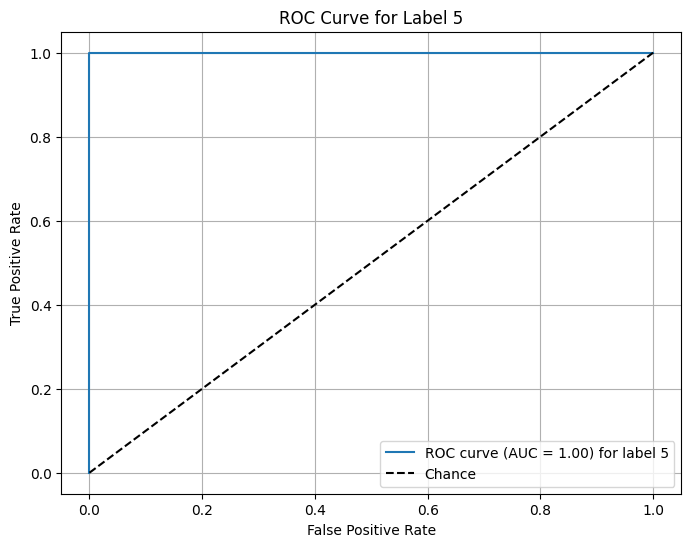

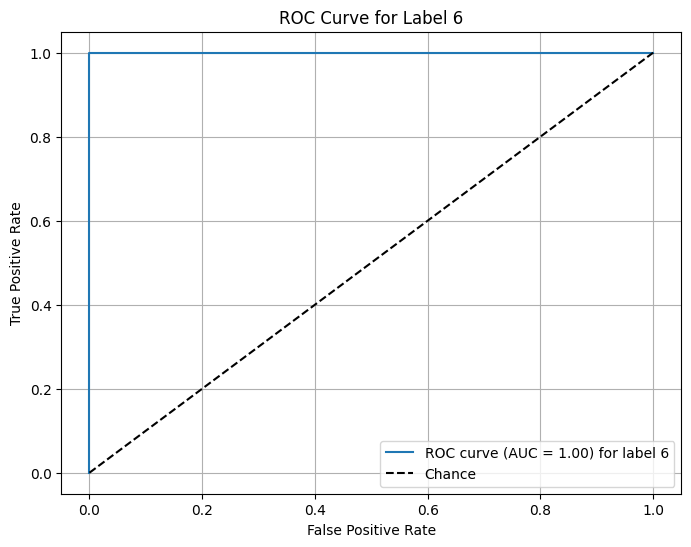

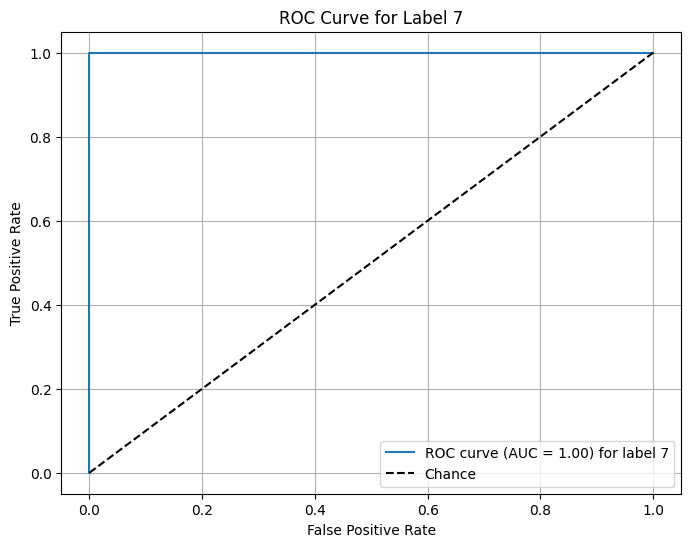

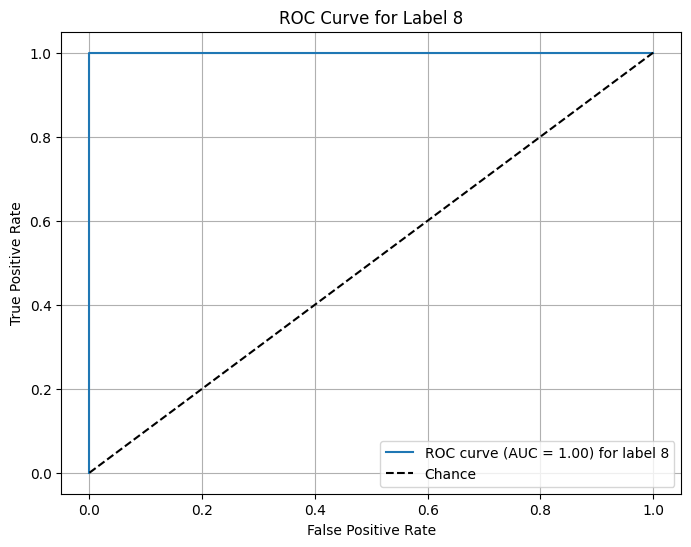

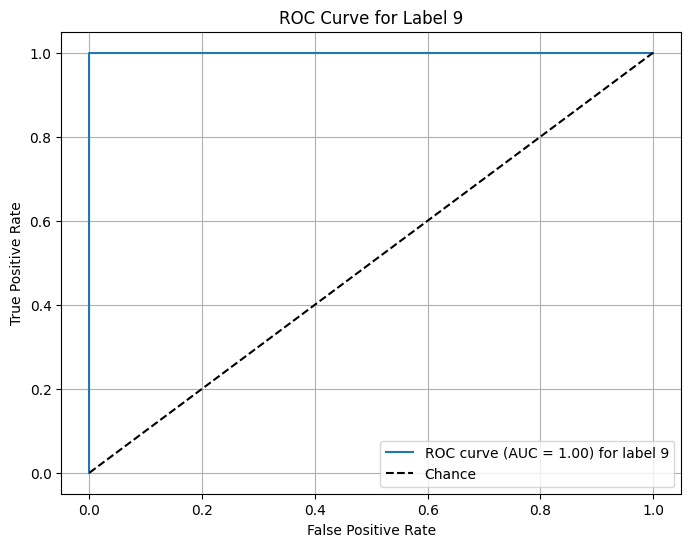

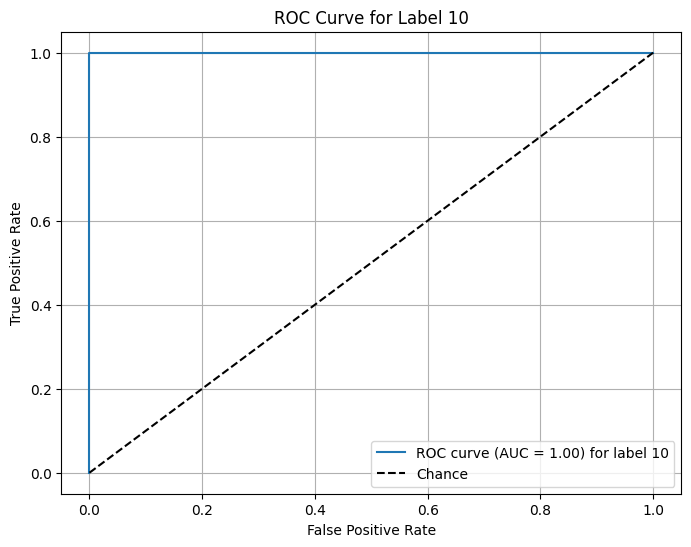

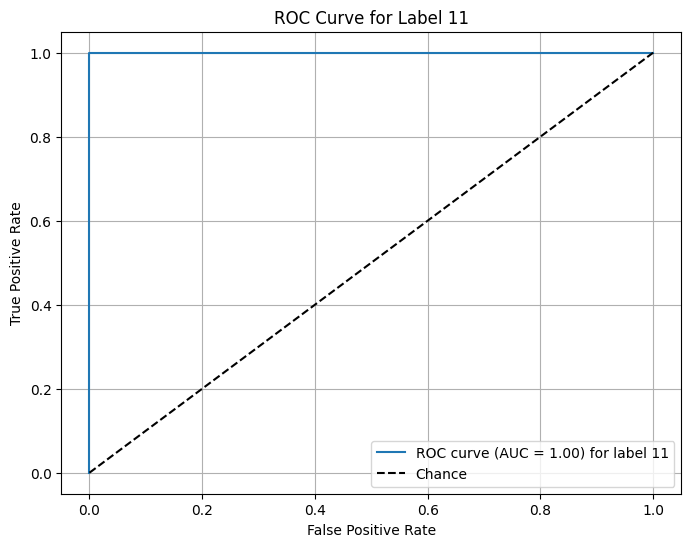

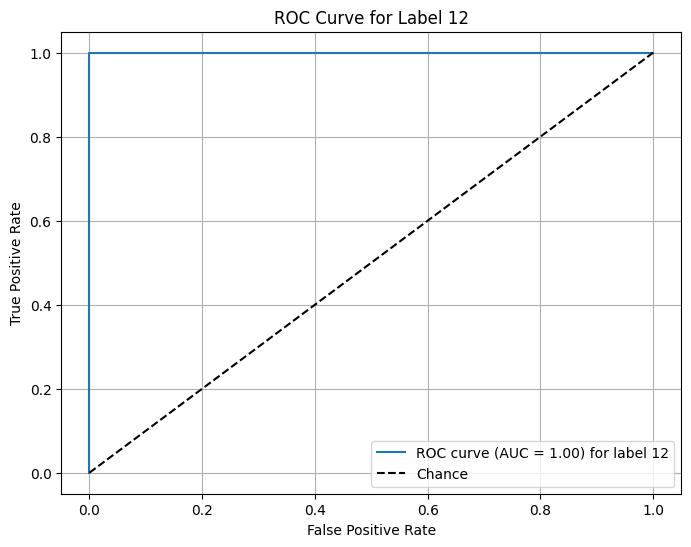

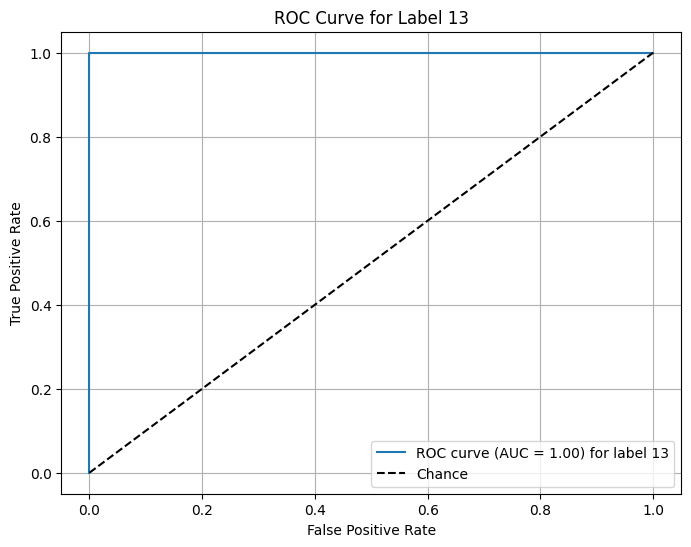

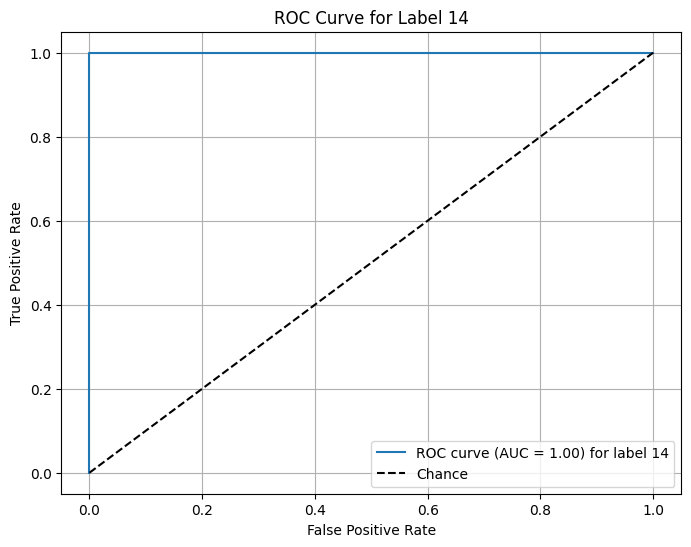

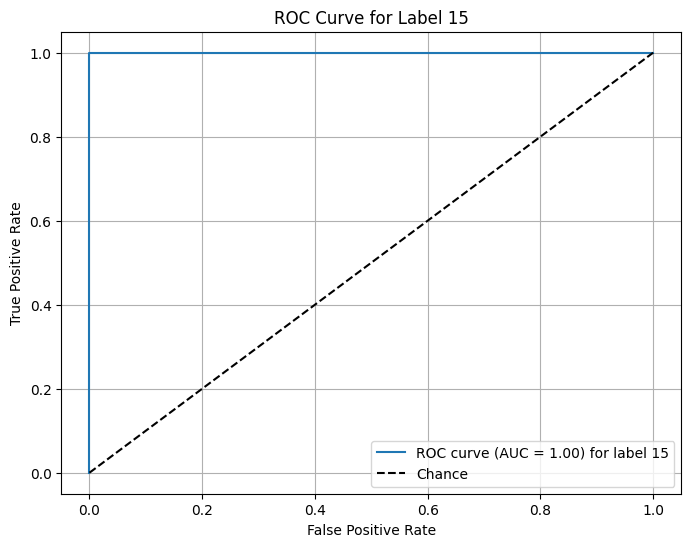

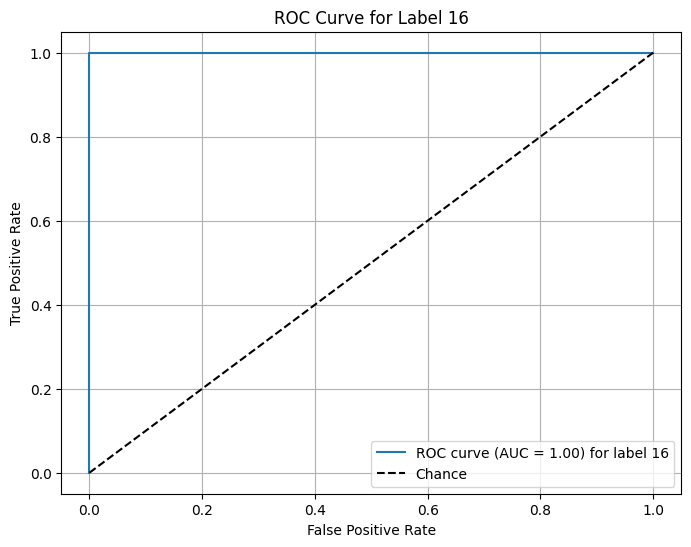

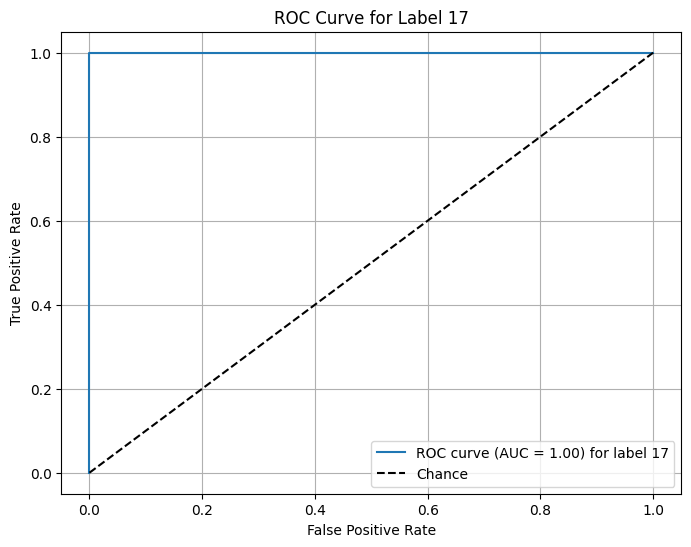

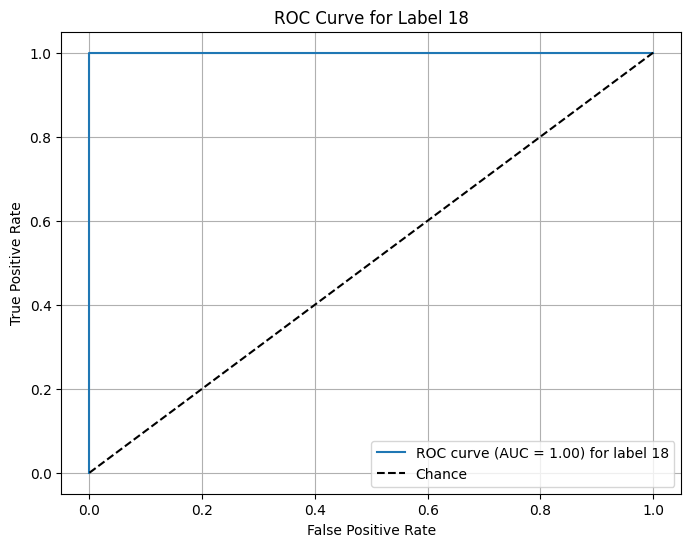

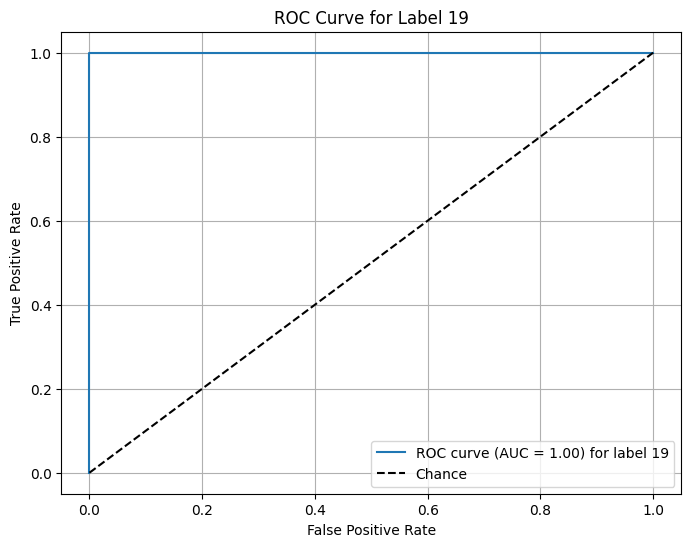

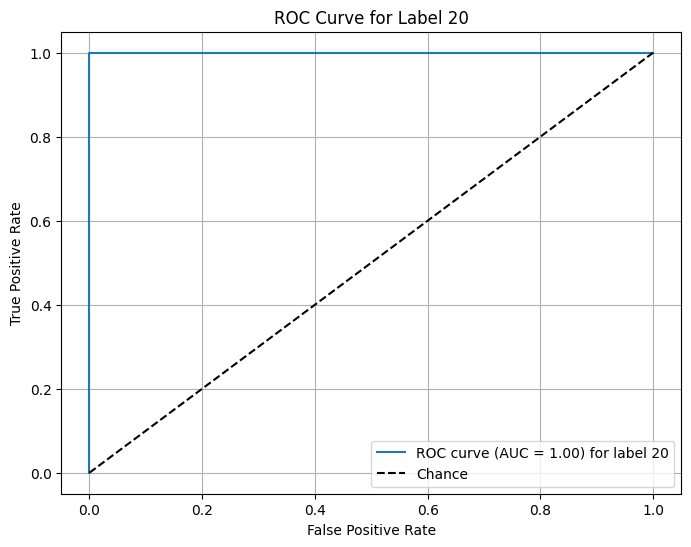

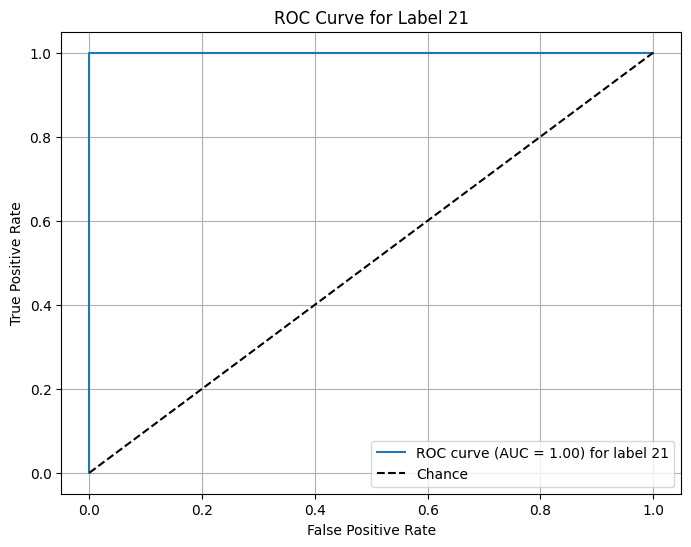

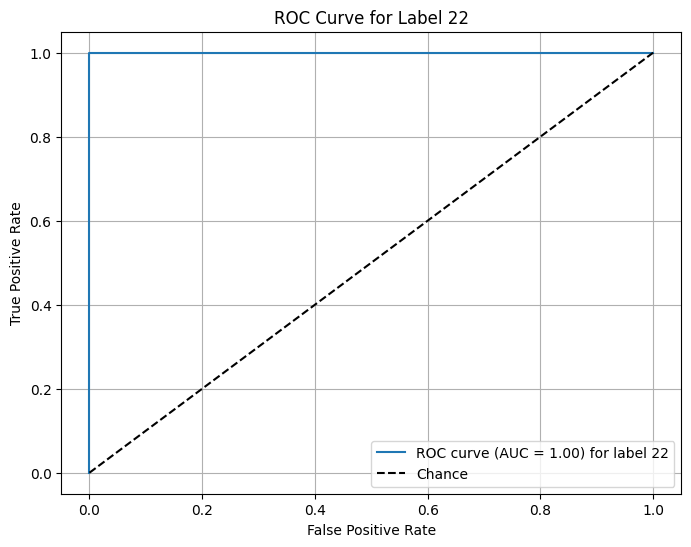

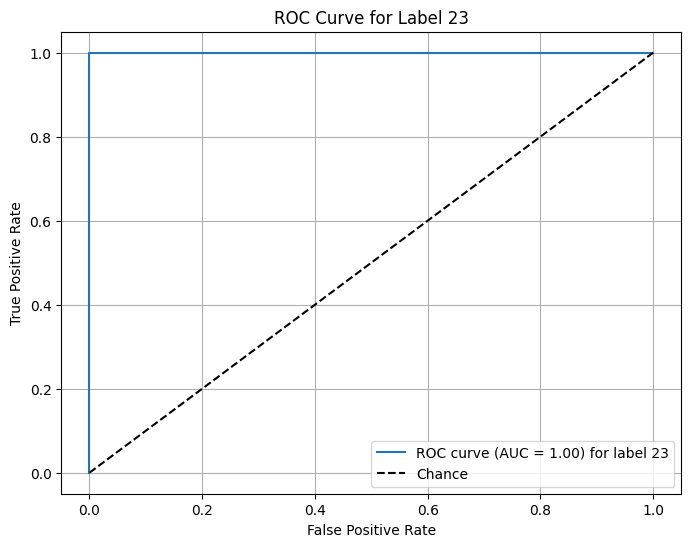

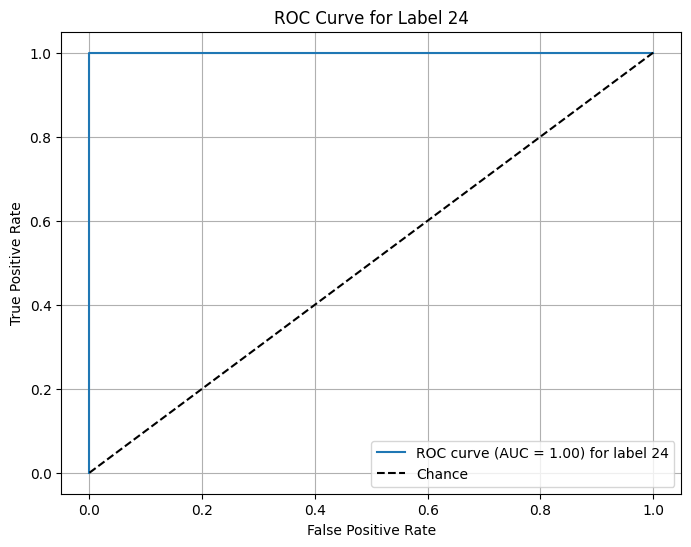

In [36]:
# ----- ROC Curve -----
y_pred = model.predict(X_test)
# ----- ROC Curve (One-vs-Rest for Multi-label) -----
n_classes = y_test.shape[1]  # Number of labels

# Create ROC curve for each label
for i in range(n_classes):
    fpr, tpr, roc_thresholds = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) for label {i+1}')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Label {i+1}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
# ----- Precision-Recall Curve (One-vs-Rest for Multi-label) -----
for i in range(n_classes):
    precision, recall, pr_thresholds = precision_recall_curve(y_test[:, i], y_pred[:, i])
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'PR curve for label {i+1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Label {i+1}')
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

In [40]:
# ----- F1 Score vs Threshold (One-vs-Rest for Multi-label) -----
for i in range(n_classes):
    f1_scores = []
    for thresh in pr_thresholds:
        y_pred_thresh = (y_pred[:, i] >= thresh).astype(int)  # Binarize predictions
        f1 = f1_score(y_test[:, i], y_pred_thresh)
        f1_scores.append(f1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(pr_thresholds, f1_scores, marker='o', label=f'F1 Score for label {i+1}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title(f'F1 Score vs Threshold for Label {i+1}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

ValueError: Input arrays use different devices: /job:localhost/replica:0/task:0/device:CPU:0, cpu

In [34]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [35]:
confusion_mtx = tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=24)

<Axes: >

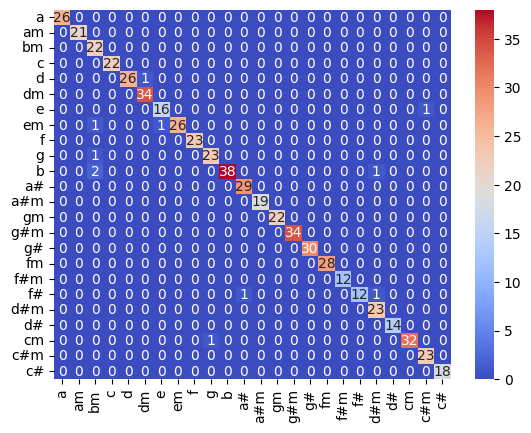

In [ ]:
import seaborn as sns
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 'd#m', 'd#', 'cm', 'c#m', 'c#']
sns.heatmap(confusion_mtx, annot=True, fmt='g', xticklabels=labels, yticklabels=labels,cmap='coolwarm') #, vmin=0, vmax=30 remove dm# 

#### To save Model to .pkl file with joblib

In [38]:
import pickle

# Save model architecture (JSON) and weights separately
model_24_json = model.to_json()  # Convert model architecture to JSON
weights = model.get_weights()  # Get model weights

with open("seq_model_24.pkl", "wb") as f:
    pickle.dump((model_24_json, weights), f)


In [41]:
import pickle

# Save the trained model to a .pkl file
with open('seq_model.pkl', 'wb') as f:
    pickle.dump(model, f)


#### PCP bar graphs

In [39]:
import matplotlib.pyplot as plt


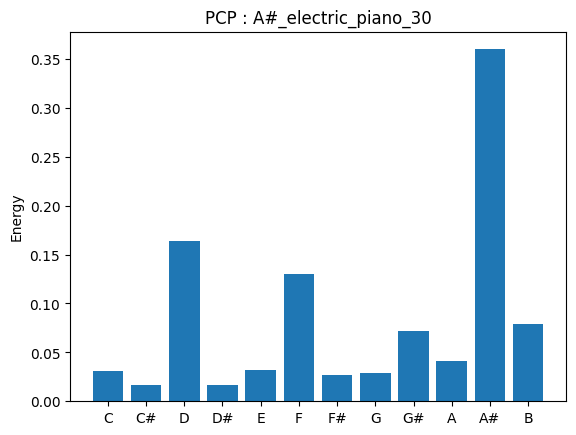

In [40]:
#           A#_electric_piano_30_part1
pitch = [
            0.03057541560599518,
            0.016574224766275517,
            0.16397135193499932,
            0.01691745074392658,
            0.03216293435490531,
            0.13056049790860716,
            0.027378704913830824,
            0.02879496256388318,
            0.07226784077986016,
            0.04151683409236626,
            0.3599312608303088,
            0.07934852150504175
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : A#_electric_piano_30')
plt.show()

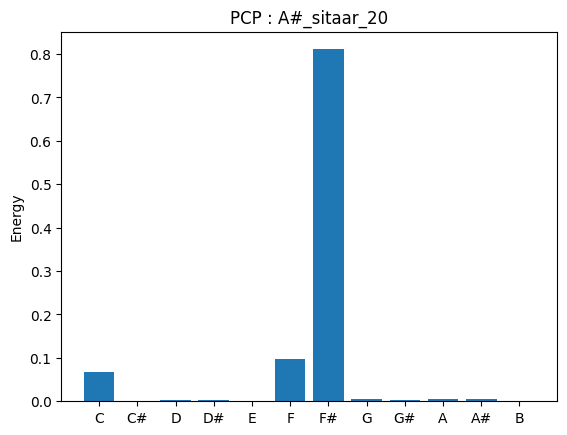

In [41]:
#           A#_sitaar_20_part37
pitch = [
            0.06683340221225632,
            0.0013509513306219152,
            0.0021282425843973203,
            0.002123645678709886,
            0.0008937309840959776,
            0.09669827120754261,
            0.810780400884404,
            0.005058010614411762,
            0.0030801155003277276,
            0.005028787522258281,
            0.004572811111568101,
            0.001451630369406234
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : A#_sitaar_20')
plt.show()

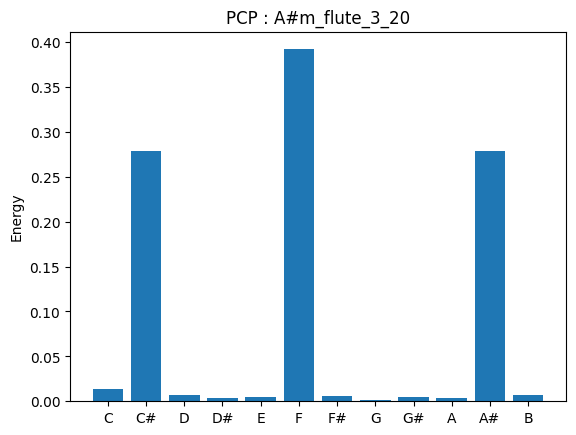

In [42]:
#           A#m_flute_3_20_part32
pitch = [
            0.013280384619510945,
            0.2783940444154687,
            0.007195265535861566,
            0.0031354605708162958,
            0.00515019610793441,
            0.39188031328248146,
            0.006083775524688031,
            0.0016453624720153567,
            0.004589572295588142,
            0.003263505755435072,
            0.2784557410367275,
            0.006926378383472552
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : A#m_flute_3_20')
plt.show()

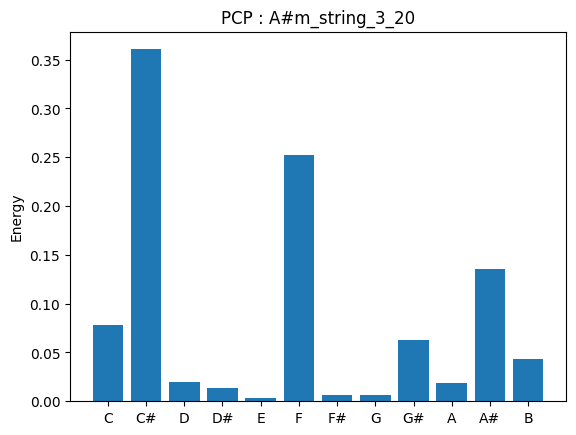

In [43]:
#           A#m_string_3_20_part31
pitch = [
            0.07776561020793096,
            0.36059821553974636,
            0.019263888304410517,
            0.013395609925701078,
            0.0029837169405412213,
            0.2522901536474695,
            0.006647975485534962,
            0.0059863874837305766,
            0.06287878530862068,
            0.018876068036980543,
            0.1356695606351061,
            0.043644028484227645
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : A#m_string_3_20')
plt.show()

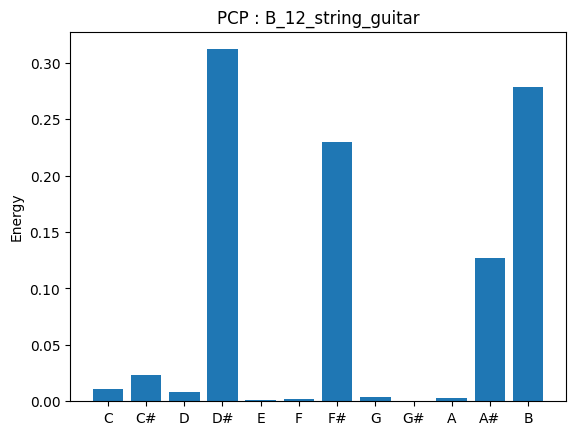

In [44]:
#           B_12_string_guitar_part4
pitch = [
            0.010674418006009873,
            0.02318158633714728,
            0.008455880088789803,
            0.3119354219538206,
            0.0013532943459740156,
            0.0018650385394796535,
            0.22959378055751675,
            0.004086236836848964,
            0.0006657929005523246,
            0.0029690681132969587,
            0.12659726724933995,
            0.2786222150712236
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : B_12_string_guitar')
plt.show()

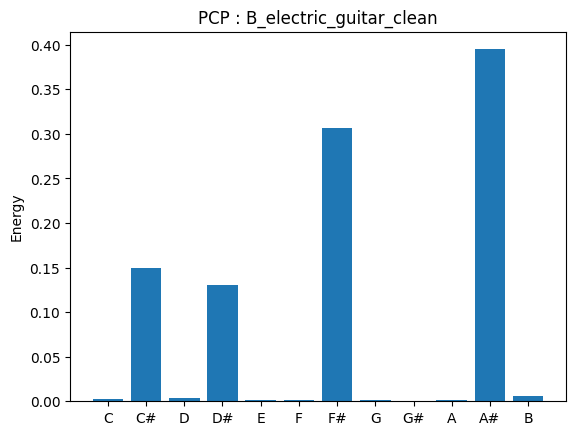

In [45]:
#           B_electric_guitar_clean_part28
pitch = [
            0.002120514953232508,
            0.14998465248898796,
            0.003692448445490648,
            0.13008057710512863,
            0.0010937821496259004,
            0.0017535711651835025,
            0.3068786031360992,
            0.0017543620062360607,
            0.0006477435102789543,
            0.0016732862442776924,
            0.39495392697233755,
            0.0053665318231213045
        ]


objects = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B')
y_pos = np.arange(len(objects))
plt.bar(y_pos, pitch, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Energy')
plt.title('PCP : B_electric_guitar_clean')
plt.show()